In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train = pd.read_csv('./open data/train.csv')
test = pd.read_csv('./open data/test_x.csv')

In [3]:
train.head()

In [4]:
test.head()

index  QaA  QaE  QbA   QbE  QcA   QcE  QdA   QdE  QeA  ...  wr_04  wr_05  \
0      0  3.0  736  2.0  2941  3.0  4621  1.0  4857  2.0  ...      0      1   
1      1  3.0  514  2.0  1952  3.0  1552  3.0   821  4.0  ...      0      0   
2      2  3.0  500  2.0  2507  4.0   480  2.0   614  2.0  ...      0      1   
3      3  1.0  669  1.0  1050  5.0  1435  2.0  2252  5.0  ...      1      1   
4      4  2.0  499  1.0  1243  5.0   845  2.0  1666  2.0  ...      1      1   

   wr_06  wr_07  wr_08  wr_09  wr_10  wr_11  wr_12  wr_13  
0      0      0      1      0      1      0      1      1  
1      0      0      0      0      0      0      0      0  
2      0      1      1      0      1      0      1      1  
3      1      1      1      1      1      1      1      1  
4      0      1      1      0      1      1      1      1  

[5 rows x 77 columns]

In [10]:
eda_train = train.copy()

In [11]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

<AxesSubplot:>

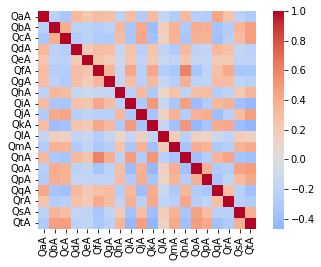

In [12]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [13]:
for col in eda_train[Answers]:
    print(sorted(eda_train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [14]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    eda_train[flip] = 6 - eda_train[flip]

<AxesSubplot:>

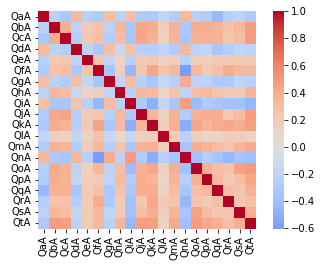

In [15]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [16]:
questions = [i for i in list(ascii_lowercase)[:20]]
eda_train['delay'] = eda_train[[('Q'+i+'E') for i in questions]].sum(axis=1)

C:\Users\hhz20\anaconda3\envs\sklearn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hhz20\anaconda3\envs\sklearn\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

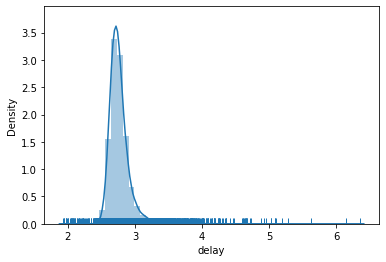

In [17]:
eda_train['delay'] = eda_train['delay'] ** (1/10)
sns.distplot(eda_train['delay'], rug = True)

In [19]:
voted = eda_train[eda_train['voted']==1]
unvoted = eda_train[eda_train['voted']==2]

<AxesSubplot:xlabel='age_group', ylabel='count'>

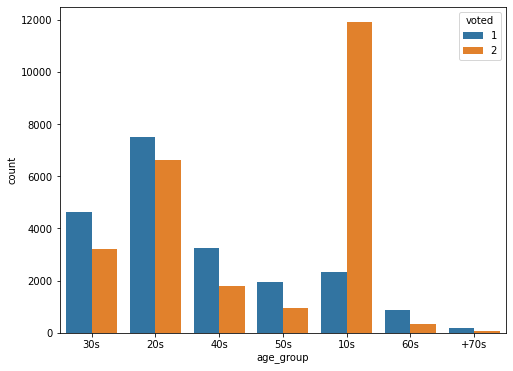

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'])

<AxesSubplot:xlabel='married', ylabel='count'>

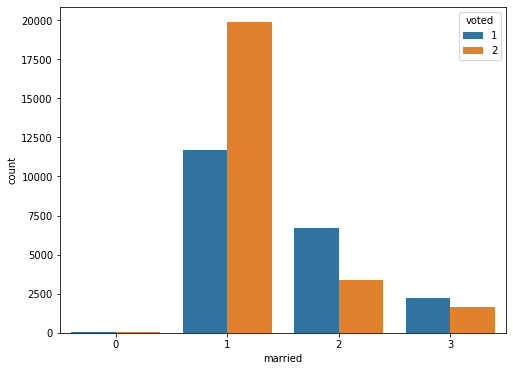

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'married', hue = eda_train['voted'])

<AxesSubplot:xlabel='gender', ylabel='count'>

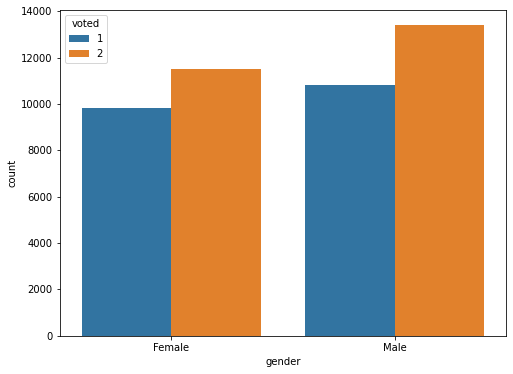

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'gender', hue = eda_train['voted'])

<AxesSubplot:xlabel='race', ylabel='count'>

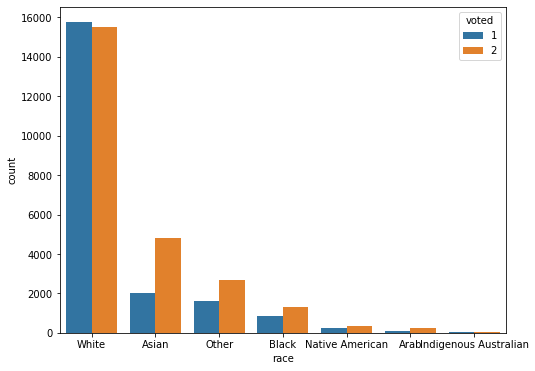

In [23]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'race', hue = eda_train['voted'])

<AxesSubplot:xlabel='religion', ylabel='count'>

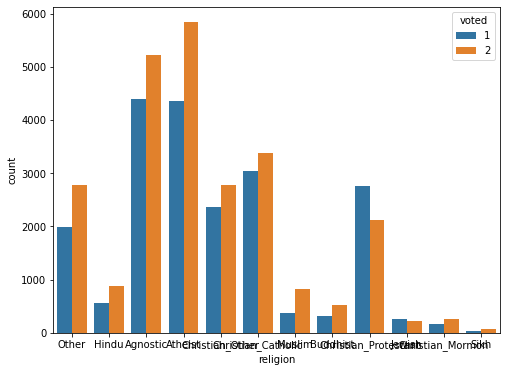

In [24]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'religion', hue = eda_train['voted'])

<AxesSubplot:xlabel='urban', ylabel='count'>

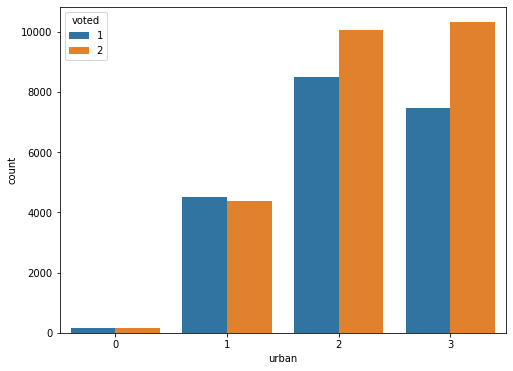

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'urban', hue = eda_train['voted'])

<AxesSubplot:xlabel='engnat', ylabel='count'>

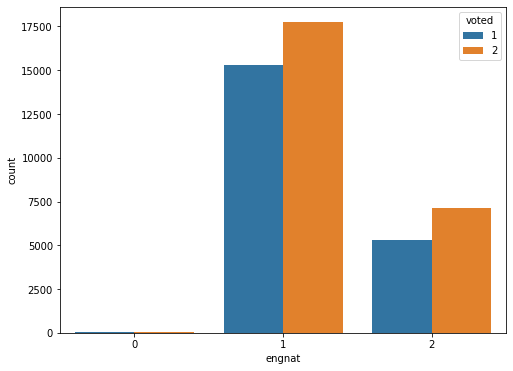

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'engnat', hue = eda_train['voted'])

<AxesSubplot:xlabel='familysize', ylabel='count'>

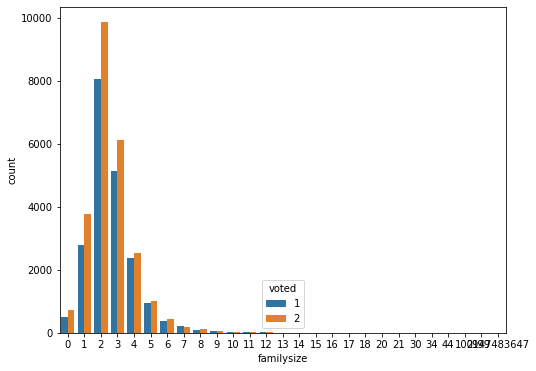

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'familysize', hue = eda_train['voted'])

In [28]:
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

In [29]:
dataset = [x_train, test]

In [30]:
questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]

In [31]:
for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

In [32]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

In [33]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
  for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

In [34]:
for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

In [35]:
for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)

In [36]:
Ancoms = list(combinations(answers, 2))
for data in dataset:
  for a,b in Ancoms:
    data['%s_dv_%s'%(a,b)] = data[a]/data[b]

C:\Users\hhz20\AppData\Local\Temp\ipykernel_7312\1581226005.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['%s_dv_%s'%(a,b)] = data[a]/data[b]
C:\Users\hhz20\AppData\Local\Temp\ipykernel_7312\1581226005.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['%s_dv_%s'%(a,b)] = data[a]/data[b]
C:\Users\hhz20\AppData\Local\Temp\ipykernel_7312\1581226005.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

In [37]:
for data in dataset:
  data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
  data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)

In [38]:
for data in dataset:
  data.drop('hand', axis=1, inplace = True)

In [39]:
wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend([('wr_'+str(i)) for i in range(10,14)])
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]

In [40]:
for data in dataset:
  data.drop(wr_no_need, axis=1, inplace = True)

In [41]:
for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

In [42]:
for data in dataset:
  data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace = True)
  data.drop('tp10', axis = 1, inplace = True)

In [43]:
index = test['index']
for data in dataset:
  data.drop('index', axis = 1, inplace = True)

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
  x_train[i] = encoder.fit_transform(x_train[i])
  test[i] = encoder.transform(test[i])

In [45]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [46]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [47]:
model = soft_vote
pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y
})
submission.to_csv('./open data/model1.csv', index=False)

In [48]:
!pip install eli5

     -------------------------------------- 216.2/216.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=dc06d2094bca0eddd99ae920931c21c15ce14841754e7d9d22b43e7f49d0e548
  Stored in directory: c:\users\hhz20\appdata\local\pip\cache\wheels\b8\58\ef\2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [49]:
import pandas as pd
import numpy as np

from string import ascii_lowercase
from itertools import combinations

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

In [50]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance

import matplotlib.pyplot as plt

import warnings
import gc
warnings.filterwarnings("ignore")

In [51]:
train = pd.read_csv('./open data/train.csv')
test = pd.read_csv('./open data/test_x.csv')

In [52]:
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

In [53]:
dataset = [x_train, test]

In [54]:
questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]

In [55]:

for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

In [62]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

In [63]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
  for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

In [64]:
for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

In [65]:
for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)
  data['delay_var'] = data['delay'].var()

In [66]:
Ancoms = list(combinations(answers, 2))
for data in dataset:
  for a,b in Ancoms:
    data['mach_%s_dv_%s'%(a,b)] = data[a]/data[b]

In [67]:
for data in dataset:
  data['mach_var'] = data[answers].var(axis=1)

In [69]:
tps = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10']
for data in dataset:
  for tp in tps:
    data[tp] = 7 - data[tp]

In [70]:
for data in dataset:
  for tp in tps:
    data[tp] = data[tp].replace(0, np.nan)
    mean = data[tp].mean(axis=0)
    data[tp] = data[tp].replace(np.nan , mean)

In [71]:
for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

In [72]:
index = test['index']
for data in dataset:
  data.drop('index', axis = 1, inplace = True)

In [73]:
import numpy as np
for data in dataset:
  teenager_ox = 1*np.array(data['age_group'] == '10s')
  data['teenager_ox'] = teenager_ox

In [74]:
tpcoms = list(combinations(tps, 2))
for data in dataset:
  for a,b in tpcoms:
    data['tp_%s_dv_%s'%(a,b)] = data[a]/data[b]

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
  x_train[i] = encoder.fit_transform(x_train[i])
  test[i] = encoder.transform(test[i])

In [76]:
for data in dataset:
  data['Es_gender'] = data['Es']*data['gender']
  data['Con_gender'] = data['Con']*data['gender']
  data['Op_gender'] = data['Op']*data['gender']

In [77]:
def lgbm_rfe_4040(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=4040)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)        
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

lgbm_archive_4040 = lgbm_rfe_4040(x_train, y_train)

327 0.7665590942938225
294 0.7665528480357506
264 0.7672607728218537
237 0.7672607728218537
213 0.7662522196746191
191 0.7668544397501172
171 0.766027665143139
153 0.7666827764188281
137 0.7671529549493142
123 0.7672102900047503
110 0.7680099353415955
99 0.7666848118909859
89 0.7683897451234594
80 0.7675948388630119
72 0.7679549775933361
64 0.7680814720882695
57 0.7662397271584752
51 0.7671283739038672
45 0.7674011582489171
40 0.7664250172766527


In [78]:
model = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_1 = x_train[lgbm_archive_4040.iloc[7,2]]

model.fit(x_train_1, y_train)

pred_y1 = model.predict_proba(test[lgbm_archive_4040.iloc[7,2]])
pred_y1 = pred_y1[:,1]

In [79]:
def lgbm_rfe_1234(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=1234)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [80]:
lgbm_archive_1234 = lgbm_rfe_1234(x_train, y_train)

327 0.7605139830321062
294 0.7605139830321062
264 0.7610637046671986
237 0.7616640720827128
213 0.7602169607921923
191 0.7611186176505217
171 0.7612385353962923
153 0.7605161322072902
137 0.7608980780144362
123 0.7613886194633042
110 0.7603517670269182
99 0.7613584531420629
89 0.7608445666671027
80 0.761711462952892
72 0.7618833502464076
64 0.7601841157888376
57 0.7604927404599983
51 0.7593006801983719
45 0.761184463394563
40 0.7590205087377988


In [81]:
model2 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_2 = x_train[lgbm_archive_1234.iloc[14,2]]

model2.fit(x_train_2, y_train)

pred_y2 = model2.predict_proba(test[lgbm_archive_1234.iloc[14,2]])
pred_y2 = pred_y2[:,1]

In [82]:
def lgbm_rfe_99087(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=99087)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [83]:
lgbm_archive_99087 = lgbm_rfe_99087(x_train, y_train)

327 0.7604232623480807
294 0.7599213835244532
264 0.7601658323188046
237 0.7599442952484446
213 0.7595475893317534
191 0.7605925476131151
171 0.7587234832594367
153 0.7589670604121147
137 0.7580329095785077
123 0.7595124123642123
110 0.7586161779434064
99 0.7588852194849769
89 0.7596013820750378
80 0.7595997321818697
72 0.7593681245371738
64 0.7587439512737363
57 0.7578454132285073
51 0.7579036887003985
45 0.7579766264304418
40 0.7600447986464152


In [84]:
model3 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_3 = x_train[lgbm_archive_99087.iloc[7,2]]

model3.fit(x_train_3, y_train)

pred_y3 = model3.predict_proba(test[lgbm_archive_99087.iloc[7,2]])
pred_y3 = pred_y3[:,1]

In [85]:
def lgbm_rfe_42(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=42)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [86]:
lgbm_archive_42 = lgbm_rfe_42(x_train, y_train)

327 0.7685705846526576
294 0.7685720478128371
264 0.7683363544996783
237 0.7701410380567341
213 0.7687319681073419
191 0.7691739358747326
171 0.7700440025188768
153 0.7697567872887617
137 0.7692588147306734
123 0.7680675688616103
110 0.7670975870558515
99 0.7688443356960153
89 0.768841985300408
80 0.7677589821535551
72 0.7687688739880378
64 0.7703421603192703
57 0.7697526312912307
51 0.7697593556018427
45 0.7693523168923524
40 0.7686346835209437


In [87]:
model4 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_4 = x_train[lgbm_archive_42.iloc[8,2]]

model4.fit(x_train_4, y_train)

pred_y4 = model4.predict_proba(test[lgbm_archive_42.iloc[8,2]])
pred_y4 = pred_y4[:,1]

In [89]:
pred_all = (pred_y + pred_y2 + pred_y3 + pred_y4) * (1/4)

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_all
})
submission.to_csv('./open data/model2.csv', index=False)

In [93]:
!pip install tqdm

  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)


In [95]:
import random
from datetime import datetime

import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import StratifiedKFold
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm import tqdm

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE',
             'index', 'hand']
replace_dict = {'education': str, 'engnat': str, 'married': str, 'urban': str}
train_data = pd.read_csv('./open data/train.csv')
test_data = pd.read_csv('./open data/test_x.csv')
train_data = train_data.drop(train_data[train_data.familysize > 50].index)
train_y = train_data['voted']
train_x = train_data.drop(drop_list + ['voted'], axis=1)
test_x = test_data.drop(drop_list, axis=1)
train_x = train_x.astype(replace_dict)
test_x = test_x.astype(replace_dict)
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)
train_y = 2 - train_y.to_numpy()
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

train_y_t = torch.tensor(train_y, dtype=torch.float32)
train_x_t = torch.tensor(train_x, dtype=torch.float32)
test_x_t = torch.tensor(test_x, dtype=torch.float32)
train_x_t[:, :20] = (train_x_t[:, :20] - 3.) / 2.
test_x_t[:, :20] = (test_x_t[:, :20] - 3.) / 2
train_x_t[:, 20] = (train_x_t[:, 20] - 5.) / 4.
test_x_t[:, 20] = (test_x_t[:, 20] - 5.) / 4.
train_x_t[:, 21:31] = (train_x_t[:, 21:31] - 3.5) / 3.5
test_x_t[:, 21:31] = (test_x_t[:, 21:31] - 3.5) / 3.5
test_len = len(test_x_t)

N_REPEAT = 5
N_SKFOLD = 7
N_EPOCH = 48
BATCH_SIZE = 72
LOADER_PARAM = {
    'batch_size': BATCH_SIZE,
    'num_workers': 4,
    'pin_memory': True
}
prediction = np.zeros((test_len, 1), dtype=np.float32)

for repeat in range(N_REPEAT):

    skf, tot = StratifiedKFold(n_splits=N_SKFOLD, random_state=repeat, shuffle=True), 0.
    for skfold, (train_idx, valid_idx) in enumerate(skf.split(train_x, train_y)):
        train_idx, valid_idx = list(train_idx), list(valid_idx)
        train_loader = DataLoader(TensorDataset(train_x_t[train_idx, :], train_y_t[train_idx]),
                                  shuffle=True, drop_last=True, **LOADER_PARAM)
        valid_loader = DataLoader(TensorDataset(train_x_t[valid_idx, :], train_y_t[valid_idx]),
                                  shuffle=False, drop_last=False, **LOADER_PARAM)
        test_loader = DataLoader(TensorDataset(test_x_t, torch.zeros((test_len,), dtype=torch.float32)),
                                 shuffle=False, drop_last=False, **LOADER_PARAM)
        model = nn.Sequential(
            nn.Dropout(0.05),
            nn.Linear(91, 180, bias=False),
            nn.LeakyReLU(0.05, inplace=True),
            nn.Dropout(0.5),
            nn.Linear(180, 32, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(32, 1)
        ).to(DEVICE)
        criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([1.20665], device=DEVICE))
        optimizer = optim.AdamW(model.parameters(), lr=5e-3, weight_decay=7.8e-2)
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer, T_0=N_EPOCH // 6, eta_min=4e-4)
        prediction_t, loss_t = np.zeros((test_len, 1), dtype=np.float32), 1.

        # for epoch in range(N_EPOCH):
        for epoch in tqdm(range(N_EPOCH), desc='{:02d}/{:02d}'.format(skfold + 1, N_SKFOLD)):
            model.train()
            for idx, (xx, yy) in enumerate(train_loader):
                optimizer.zero_grad()
                xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                pred = model(xx).squeeze()
                loss = criterion(pred, yy)
                loss.backward()
                optimizer.step()
                scheduler.step(epoch + idx / len(train_loader))

            with torch.no_grad():
                model.eval()
                running_acc, running_loss, running_count = 0, 0., 0
                for xx, yy in valid_loader:
                    xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                    pred = model(xx).squeeze()
                    loss = criterion(pred, yy)
                    running_loss += loss.item() * len(yy)
                    running_count += len(yy)
                    running_acc += ((torch.sigmoid(pred) > 0.5).float() == yy).sum().item()
                # print('R{:02d} S{:02d} E{:02d} | {:6.4f}, {:5.2f}%'
                #       .format(repeat + 1, skfold + 1, epoch + 1, running_loss / running_count,
                #               running_acc / running_count * 100))

                if running_loss / running_count < loss_t:
                    loss_t = running_loss / running_count
                    for idx, (xx, _) in enumerate(test_loader):
                        xx = xx.to(DEVICE)
                        pred = (2. - torch.sigmoid(model(xx).detach().to('cpu'))).numpy()
                        prediction_t[BATCH_SIZE * idx:min(BATCH_SIZE * (idx + 1), len(prediction)), :] \
                            = pred[:, :].copy()
        prediction[:, :] += prediction_t[:, :].copy() / (N_REPEAT * N_SKFOLD)
        tot += loss_t
    print('R{} -> {:6.4f}'.format(repeat + 1, tot / N_SKFOLD))

df = pd.read_csv('./open data/sample_submission.csv')
df.iloc[:, 1:] = prediction

07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [03:24<00:00,  4.26s/it]


R1 -> 0.6057


07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [03:28<00:00,  4.33s/it]


R2 -> 0.6052


07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [03:14<00:00,  4.05s/it]


R3 -> 0.6050


07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [03:34<00:00,  4.47s/it]


R4 -> 0.6055


07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [03:17<00:00,  4.11s/it]

R5 -> 0.6054


In [ ]:
df.to_csv('../data/model3.csv', index=False)

In [ ]:
model1 = pd.read_csv('../data/model1.csv', index_col = 'index')
model2 = pd.read_csv('../data/model2.csv', index_col='index')

pred_y = (model1)*(0.7) + (model2)*(0.3)

test = pd.read_csv('../data/test_x.csv')
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': pred_y['voted']
    })

submission.to_csv('../data/combined_model1_model2.csv', index=False)

In [ ]:
combined_12 = pd.read_csv('../data/combined_model1_model2.csv', index_col = 'index')
model3 = pd.read_csv('../data/model3.csv', index_col='index')
model3['voted'] = model3['voted']-1

In [ ]:
pred_y = (model3)*(0.8) + (combined_12)*(0.2)

test = pd.read_csv('../data/test_x.csv')
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': pred_y['voted']
    })

submission.to_csv('.data/submission_final.csv', index=False)